# Smoothing

#data is in between 4 and -4. Columns data is 15, rows data is 550
columns= x1= top10
x2= top20
x3= top50 and so on. it is assumed that the top10 students will be able to solve the qs better than the rest. Thus removing the anamolies is necessary as many students may answer by fluke and get their answers right.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:/iAnalyst/MyPat task")

In [3]:
df= pd.read_csv("Theta.csv")

In [4]:
data= df.copy()

In [5]:
data.head()

,Goal Levels,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5ace20379fe7b01d5806bec9,-0.30,-0.30,-1.53,-2.27,-1.98,-1.57,-1.26,-1.00,-1.08,-1.12,-1.24,-1.29,-1.31,-1.35,-1.37
1,5ace20379fe7b01d5806bebb,1.23,0.91,-0.51,-0.77,-1.49,-1.99,-2.19,-2.24,-2.31,-2.41,-2.38,-2.38,-2.37,-2.39,-2.41
2,5ace203f9fe7b01d5806c144,-0.05,0.26,-0.22,-0.62,-1.05,-0.82,-1.12,-1.29,-1.29,-1.58,-1.75,-1.88,-1.96,-2.02,-2.05
3,5ace203f9fe7b01d5806c145,-0.05,1.45,0.24,0.89,0.81,0.51,0.22,0.03,0.02,-0.19,-0.39,-0.55,-0.64,-0.70,-0.72
4,5ace20349fe7b01d5806bdcc,NaN,2.67,0.55,1.05,1.20,1.01,0.48,0.71,0.66,0.40,0.28,0.21,0.21,0.19,0.19


In [6]:
data.tail()

,Goal Levels,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
643,5ace20369fe7b01d5806be48,NaN,-1.60,-1.60,-0.63,-1.98,-1.53,-1.61,-1.44,-1.14,-1.40,-1.73,-1.81,-1.88,-1.89,-1.90
644,5ace20369fe7b01d5806be45,3.85,2.27,-0.60,-0.52,-0.67,-0.52,-0.63,-0.63,-0.50,-0.53,-0.50,-0.44,-0.42,-0.41,-0.41
645,5ace20369fe7b01d5806be47,-1.33,-0.11,0.72,1.22,0.80,0.68,0.65,0.40,0.33,0.08,0.01,-0.12,-0.17,-0.23,-0.27
646,5ace20369fe7b01d5806be44,-2.33,-1.25,-0.63,-0.23,0.02,-0.02,0.04,-0.29,-0.33,-0.56,-0.67,-0.75,-0.83,-0.88,-0.90
647,5ace20369fe7b01d5806be41,0.32,-1.18,-2.08,-1.98,-1.89,-1.77,-1.94,-2.11,-2.15,-2.35,-2.33,-2.36,-2.39,-2.40,-2.39


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Goal Levels  648 non-null    object 
 1   x1           553 non-null    float64
 2   x2           621 non-null    float64
 3   x3           636 non-null    float64
 4   x4           644 non-null    float64
 5   x5           646 non-null    float64
 6   x6           647 non-null    float64
 7   x7           647 non-null    float64
 8   x8           648 non-null    float64
 9   x9           648 non-null    float64
 10  x10          648 non-null    float64
 11  x11          648 non-null    float64
 12  x12          648 non-null    float64
 13  x13          648 non-null    float64
 14  x14          648 non-null    float64
 15  x15          648 non-null    float64
dtypes: float64(15), object(1)
memory usage: 81.1+ KB


In [8]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
count,553.000000,621.000000,636.000000,644.000000,646.000000,647.000000,647.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,1.150127,0.491546,0.079623,0.199860,0.066858,0.033679,-0.108547,-0.238472,-0.302145,-0.489059,-0.637392,-0.736080,-0.794846,-0.836204,-0.862793
std,2.292796,1.706384,1.402894,1.382101,1.267742,1.206579,1.158866,1.137292,1.129045,1.107643,1.094798,1.081579,1.074110,1.070627,1.066161
min,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,-0.200000,-0.550000,-0.772500,-0.562500,-0.637500,-0.690000,-0.750000,-0.892500,-0.930000,-1.140000,-1.270000,-1.330000,-1.402500,-1.450000,-1.480000
50%,1.700000,0.560000,0.080000,0.285000,0.130000,0.090000,-0.050000,-0.200000,-0.285000,-0.510000,-0.640000,-0.745000,-0.805000,-0.850000,-0.875000
75%,3.030000,1.700000,1.022500,1.122500,0.947500,0.830000,0.620000,0.490000,0.400000,0.200000,0.010000,-0.110000,-0.170000,-0.210000,-0.250000
max,4.000000,4.000000,4.000000,4.000000,3.410000,3.220000,3.190000,3.170000,3.210000,3.230000,3.210000,3.140000,3.090000,3.070000,3.070000


In [9]:
data.columns

Index(['Goal Levels', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15'],
      dtype='object')

In [10]:
newdata= data.dropna()   #removing rows containing missing data

In [11]:
r1= newdata.iloc[0,1:]  #taking row 1
print(r1)

x1     -0.3
x2     -0.3
x3    -1.53
x4    -2.27
x5    -1.98
x6    -1.57
x7    -1.26
x8     -1.0
x9    -1.08
x10   -1.12
x11   -1.24
x12   -1.29
x13   -1.31
x14   -1.35
x15   -1.37
Name: 0, dtype: object


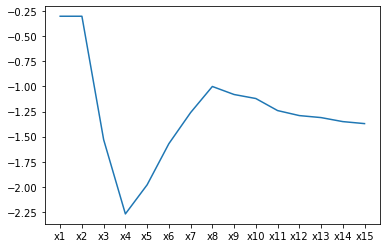

In [12]:
plt.plot(r1)

In [13]:
d=newdata.iloc[5,1:]  #Take any random row. Here 5th`
print(d.values)  
print(np.diff(d.values))  #differences between the values. x2-x1
d1= np.diff(d.values)   #Ideally all the values must be 0 or negative.


[-1.33 -0.11 0.72 1.22 0.8 0.68 0.65 0.4 0.33 0.08 0.01 -0.12 -0.17 -0.23
 -0.27]
[1.22 0.83 0.5 -0.41999999999999993 -0.12 -0.030000000000000027 -0.25
 -0.07 -0.25 -0.07 -0.13 -0.05000000000000002 -0.06 -0.04000000000000001]


In [14]:
d1[d1>0]    #Finding the values which needs change

array([1.22, 0.83, 0.5], dtype=object)

In [15]:
all(d1>0) #prints true only if all the values in d1 are positive
any(d1>0)

True

In [16]:
pos= np.where(d1>0)  #Finding their position. o\p is an array
#pos
revpos= pos[0][::-1]  #reversing the array
revpos

array([2, 1, 0], dtype=int64)

In [17]:
d[2]

0.72

In [18]:
d[3]+0.05

1.27

In [19]:
for i in revpos:
    d[i]=d[i+1]+0.05  
    print(d[i])

1.27
1.32
1.37


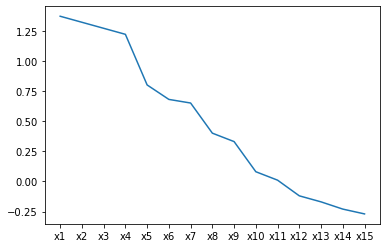

In [20]:
plt.plot(d)

In [21]:
'''
###Trying
j=0
d=newdata.iloc[5,1:]
#print(d)
d1= np.diff(d.values)
#print(d1)
while any(d1>0):
      #Take any random row
    
    d1[d1>0] 
    pos= np.where(d1>0)
    revpos= pos[0][::-1]
    for i in revpos:
        d[i]=d[i+1]+0.05  #take any number in place of 0.05. But if the number is greater than 4 then 4.05 would be wrong
    #print(d)
    d1=np.diff(d.values)
    
#plt.plot(d)
   
'''        

'\n###Trying\nj=0\nd=newdata.iloc[5,1:]\n#print(d)\nd1= np.diff(d.values)\n#print(d1)\nwhile any(d1>0):\n      #Take any random row\n    \n    d1[d1>0] \n    pos= np.where(d1>0)\n    revpos= pos[0][::-1]\n    for i in revpos:\n        d[i]=d[i+1]+0.05  #take any number in place of 0.05. But if the number is greater than 4 then 4.05 would be wrong\n    #print(d)\n    d1=np.diff(d.values)\n    \n#plt.plot(d)\n   \n'

In [22]:
#plt.plot(d)

In [23]:
d1

array([1.22, 0.83, 0.5, -0.41999999999999993, -0.12,
       -0.030000000000000027, -0.25, -0.07, -0.25, -0.07, -0.13,
       -0.05000000000000002, -0.06, -0.04000000000000001], dtype=object)

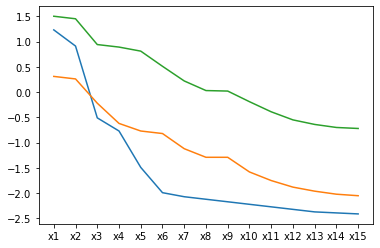

In [24]:
#plot for any rows. 
for num in range(1,4):
    d=newdata.iloc[num,1:]
    d1= np.diff(d.values)
    while any(d1>0):
        
        d1[d1>0] 
        pos= np.where(d1>0)
        revpos= pos[0][::-1]
        for i in revpos:
            if d[i+1]<3.95 and d[i+1]>=-4:
                d[i]=d[i+1]+0.05
            else:
                d[i]= d[i+1]
        d1= np.diff(d.values)
        #print(pos)
        
    plt.plot(d)

In [25]:
duplicate= newdata.copy()

In [26]:
#Take any random rows and smooth them.

ran= np.random.randint(0,550,550)
print(ran)

empty=pd.DataFrame()

for num in ran:
    d=newdata.iloc[num,1:]
    d1= np.diff(d.values)

    while any(d1>0):
        
        d1[d1>0] 
        pos= np.where(d1>0)
        revpos= pos[0][::-1]
        for i in revpos:
            if d[i+1]<3.95 and d[i+1]>=-4:
                d[i]=d[i+1]+0.05
                
            else:
                d[i]= d[i+1]
                
        d1= np.diff(d.values)
        #print(pos)
       
    #plt.plot(d)
    empty=empty.append(d)
   

[393 524 291 394 280  11 146 544 147 390 455 275 165 293  84 150 525 321
 308 255 373 515  79 369 354 437 524 206 472 170 523 216 491 219 117 109
 310 120 358 221 188 509 406  27 488 508 120 513 388 172 473   9 133 318
 128  97 351   9 521 255 260 434  89 396 109 194 527 512  93 300 428 188
 161 199 460 221 252 137  57 482 368  34 260  55 317 363 486 107 468 477
  35 285 156 185 372 286 372 393 510 528 350 244 357 348  21 374  80 207
 318 416  51 151  18 484 531 112 430 130 185 464 416 187 495 478 175 415
 254 199 134 190 510 468  80 133 253 504 525   8 114 319 523 209 391  21
  20 279 338 454 200  75 522 305 313 512 209 273 106 414 310 536 402 536
 350 101  19 530 505 543 502 495 162  55  14 385 121 167 510 393 331 153
 342  54  30 136 121 324 319 153  61  45  12 484 526 460 410 175 154 465
 246 179 517 145 232 454 202 399  66 532  54 485 434 521 173 401 436 107
 156 121 223  71 259 405  56 281 503 230 372 394  16 204 540  52  75 350
 267 425 314 324  48 243 536 475 215 325 290  62 44

In [27]:
print(empty)

       x1   x10   x11   x12   x13   x14   x15    x2    x3    x4    x5    x6  \
463  3.70 -0.45 -0.50 -0.55 -0.60 -0.65 -0.68  1.72  0.34  0.16  0.11  0.06   
616 -0.25 -1.47 -1.64 -1.79 -1.86 -1.94 -1.98 -0.30 -0.57 -0.62 -0.67 -1.05   
335 -0.03 -1.33 -1.37 -1.44 -1.44 -1.45 -1.48 -0.17 -0.22 -0.27 -0.66 -0.82   
464  3.90  0.60  0.53  0.47  0.45  0.42  0.37  1.97  1.92  1.87  1.38  1.18   
321  1.04 -0.86 -1.14 -1.29 -1.39 -1.44 -1.46  0.13  0.08  0.03 -0.02 -0.07   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
174  2.24  0.56  0.44  0.41  0.36  0.32  0.28  2.19  2.14  1.91  0.81  0.76   
272  2.40  1.23  0.99  0.80  0.68  0.60  0.55  2.35  2.30  2.25  2.11  1.95   
248 -0.49 -1.18 -1.37 -1.48 -1.54 -1.59 -1.62 -0.54 -0.59 -0.64 -0.69 -0.74   
407  3.70 -0.49 -0.69 -0.70 -0.75 -0.80 -0.89  1.78  0.06  0.01 -0.04 -0.09   
199  2.27  0.73  0.52  0.40  0.37  0.31  0.25  2.22  2.17  2.12  1.57  1.28   

       x7    x8    x9  
463  0.01 -0.19 -0.24  
616

In [31]:
empty

,x1,x10,x11,x12,x13,x14,x15,x2,x3,x4,x5,x6,x7,x8,x9
463,3.70,-0.45,-0.50,-0.55,-0.60,-0.65,-0.68,1.72,0.34,0.16,0.11,0.06,0.01,-0.19,-0.24
616,-0.25,-1.47,-1.64,-1.79,-1.86,-1.94,-1.98,-0.30,-0.57,-0.62,-0.67,-1.05,-1.29,-1.40,-1.42
335,-0.03,-1.33,-1.37,-1.44,-1.44,-1.45,-1.48,-0.17,-0.22,-0.27,-0.66,-0.82,-0.96,-1.02,-1.08
464,3.90,0.60,0.53,0.47,0.45,0.42,0.37,1.97,1.92,1.87,1.38,1.18,0.82,0.64,0.62
321,1.04,-0.86,-1.14,-1.29,-1.39,-1.44,-1.46,0.13,0.08,0.03,-0.02,-0.07,-0.28,-0.34,-0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2.24,0.56,0.44,0.41,0.36,0.32,0.28,2.19,2.14,1.91,0.81,0.76,0.71,0.66,0.61
272,2.40,1.23,0.99,0.80,0.68,0.60,0.55,2.35,2.30,2.25,2.11,1.95,1.70,1.54,1.49
248,-0.49,-1.18,-1.37,-1.48,-1.54,-1.59,-1.62,-0.54,-0.59,-0.64,-0.69,-0.74,-0.79,-0.95,-0.96
407,3.70,-0.49,-0.69,-0.70,-0.75,-0.80,-0.89,1.78,0.06,0.01,-0.04,-0.09,-0.14,-0.39,-0.44


In [30]:
df1= data['Goal Levels']+empty
df2= pd.DataFrame(df1)
df2

SyntaxError: invalid syntax (<ipython-input-30-4b9abf3bf59d>, line 1)

In [ ]:
output= 
output.to_csv('Submission4.csv', index=None)